In [1]:
#Importing libraries
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
plt.style.use('fivethirtyeight')

In [ ]:
consumerkey = "QjiPb0zKLgNNC25qQFdxlKckl"
consumersecret = "MzdgLT4h0tZL5Mih1h4jfGzidu81zXxjK8LBx4U9c5CULtJI5k"
accesstoken = "1240512892476112897-mzKvCA46ykm3srwza26Jy8UC1qNMvh"
accesstokensecret = "RPZokAn94YUKh6r1sj6yEIQ0u43W5zDAHdXVSrdPLADZu"

In [ ]:
#create the authentication object
authenticate = tweepy.OAuthHandler(consumerkey,consumersecret)

#set the access token and access token secret 
authenticate.set_access_token(accesstoken,accesstokensecret)

#create the api object while passing in the auth info
api = tweepy.API(authenticate,wait_on_rate_limit= True)

In [ ]:
#getting the tweets
api = tweepy.API(authenticate, wait_on_rate_limit=True)
search_words = "BJP OR pmomodi OR modi_ji"
date_since = "2019-01-01"

posts1 = tweepy.Cursor(api.search,q=search_words,lang="en",since=date_since,tweet_mode="extended").items(5000)

search_words = "congress OR Rahul Gandhi"
posts2 = tweepy.Cursor(api.search,q=search_words,lang="en",since=date_since,tweet_mode="extended").items(5000)

search_words = "AAP OR Arvind Kejriwal"
posts3 = tweepy.Cursor(api.search,q=search_words,lang="en",since=date_since,tweet_mode="extended").items(5000)

In [ ]:
#create a dataframe with a column called tweets 
df1 = pd.DataFrame([tweet.full_text for tweet in posts1], columns = ['Tweets']) 

df2 = pd.DataFrame([tweet.full_text for tweet in posts2], columns = ['Tweets'])

df3 = pd.DataFrame([tweet.full_text for tweet in posts3], columns = ['Tweets'])

In [ ]:
#clean the text

# creating a function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)  #r tells python that this is a raw string this line remove mentions
  text = re.sub(r'#', '', text) #removing the hashtag symbol
  text = re.sub(r'RT[\s]+', '', text) #removing retweets
  text = re.sub(r'https?:\/\/\S+', '',text)  #remove the hyper link

  return text

#cleaning the text
df1['Tweets'] = df1['Tweets'].apply(cleanTxt)
df2['Tweets'] = df2['Tweets'].apply(cleanTxt)
df3['Tweets'] = df3['Tweets'].apply(cleanTxt)

#show the cleaned text 
df3


,Tweets,subjectivity,polarity,analysis
0,When INC is unable to fight against Modi they...,0.250000,-0.250000,Negative
1,_arora: Dec 6. 1992.\nBabri masjid demolition....,0.200000,0.300000,Positive
2,: The very first attempt to topple an elected ...,0.433333,0.325000,Positive
3,_coutinho: Arvind Kejriwal's 5th Guarantee \n\...,0.100000,0.000000,Neutral
4,: BREAKING\n\nArvind Kejriwal to visit doaba a...,0.100000,0.000000,Neutral
...,...,...,...,...
4995,: Delhi : Navjot Singh Sidhu joins Delhi gover...,0.000000,0.000000,Neutral
4996,: Those 800+ new liquor shops Kejriwal has op...,0.477273,0.068182,Positive
4997,: Punjab Congress Chief Sh. Navjot Singh Sidhu...,0.050000,0.000000,Neutral
4998,: Massive crowd in Navelim for 's Ji's public ...,0.388889,0.000000,Neutral


In [ ]:
#create a function to get the subjectivity
def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getpolarity(text):
  return TextBlob(text).sentiment.polarity

#create the two new column
df1['subjectivity'] = df1['Tweets'].apply(getsubjectivity)
df1['polarity'] = df1['Tweets'].apply(getpolarity)

df2['subjectivity'] = df2['Tweets'].apply(getsubjectivity)
df2['polarity'] = df2['Tweets'].apply(getpolarity)

df3['subjectivity'] = df3['Tweets'].apply(getsubjectivity)
df3['polarity'] = df3['Tweets'].apply(getpolarity)

#show the new dataframe with new column 
df2

,Tweets,subjectivity,polarity,analysis
0,: Rahul Gandhi becomes Pandit Rahul Gandhi ove...,0.700,0.400,Positive
1,": LoP Shri Mallikarjun kharge , Shri Srinivasa...",0.375,-0.125,Negative
2,: You don’t come from any India. You come from...,0.000,0.000,Neutral
3,: Why do people say Rahul Gandhi is not a stre...,0.000,0.000,Neutral
4,: Everytime Rahul Gandhi returns from abroad ...,0.000,0.000,Neutral
...,...,...,...,...
4995,_prakash: SONIA GANDHI is one of the \nTERROR ...,0.000,0.000,Neutral
4996,: UPSC aspirants detained by UP Government whi...,0.000,0.000,Neutral
4997,: UPSC aspirants detained by UP Government whi...,0.000,0.000,Neutral
4998,: BIG BREAKING :\n\nPolice have detained the U...,0.100,0.000,Neutral


In [ ]:
#create a function to compute the negative neutral and positive analysis
def getanalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else: 
    return 'Positive'


df1['analysis'] = df1['polarity'].apply(getanalysis)

df2['analysis'] = df2['polarity'].apply(getanalysis)

df3['analysis'] = df3['polarity'].apply(getanalysis)

df1

,Tweets,subjectivity,polarity,analysis
0,: Mr. Where is 2 crore jobs every year? \n\nN...,0.000000,0.00,Neutral
1,: NO joining NO vot। makings fool to youth of ...,0.000000,0.00,Neutral
2,: Mr. Where is 2 crore jobs every year? \n\nN...,0.000000,0.00,Neutral
3,_bjp: Extending a warm welcome to CH. VITTAL G...,0.391667,0.35,Positive
4,": Don't Vote BJP; If they get the power again,...",0.562500,0.50,Positive
...,...,...,...,...
4995,: Mr. Where is 2 crore jobs every year? \n\nN...,0.000000,0.00,Neutral
4996,"__: ""MATHURA MOSQUE"" in Indian state of Uttar ...",0.000000,0.00,Neutral
4997,: Dec 6. Babri Masjid was demolished this day ...,0.250000,0.00,Neutral
4998,": Don't Vote BJP; If they get the power again,...",0.562500,0.50,Positive


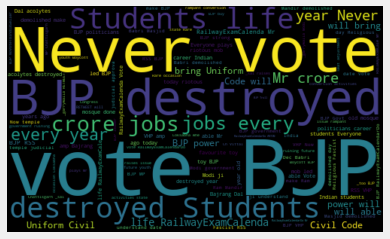

In [ ]:
from wordcloud import WordCloud
#plot the word cloud for bjp
allwords = ' '.join( [twts for twts in df1['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud , interpolation = "bilinear")
plt.axis('off')
plt.show()

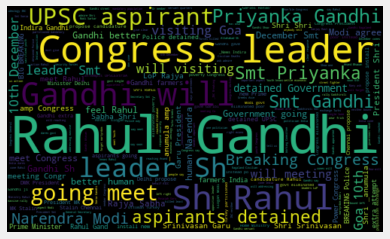

In [ ]:
#plot the word cloud for congress
allwords = ' '.join( [twts for twts in df2['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud , interpolation = "bilinear")
plt.axis('off')
plt.show()

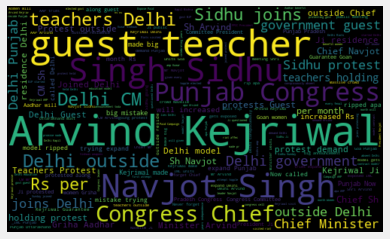

In [ ]:
#plot the word cloud for aap
allwords = ' '.join( [twts for twts in df3['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud , interpolation = "bilinear")
plt.axis('off')
plt.show()

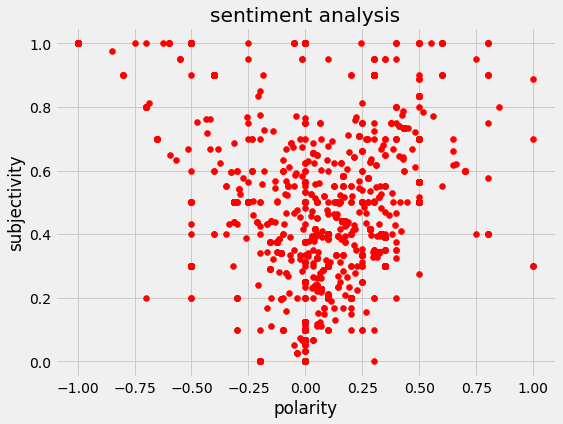

In [ ]:
# plot the polarity and subjectivity for bjp
plt.figure(figsize=(8,6))
for i in range(0,df1.shape[0]):
  plt.scatter(df1['polarity'][i], df1['subjectivity'][i], color = 'Red')

plt.title('sentiment analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

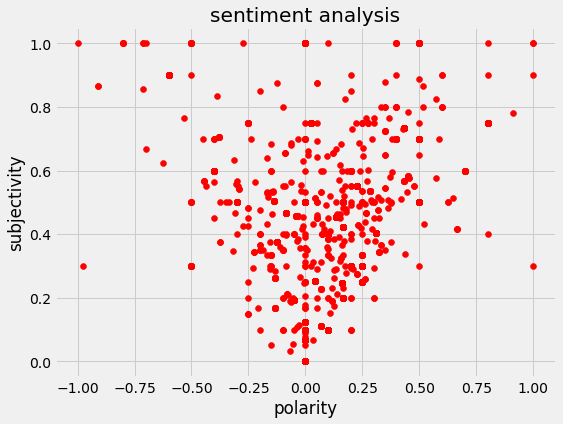

In [ ]:
# plot the polarity and subjectivity for congress
plt.figure(figsize=(8,6))
for i in range(0,df2.shape[0]):
  plt.scatter(df2['polarity'][i], df2['subjectivity'][i], color = 'Red')

plt.title('sentiment analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

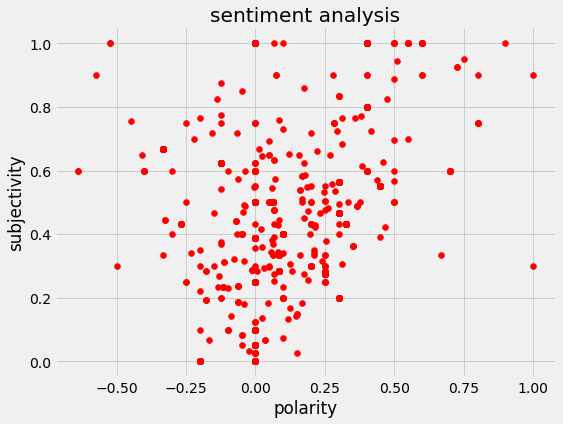

In [ ]:
# plot the polarity and subjectivity for aap
plt.figure(figsize=(8,6))
for i in range(0,df3.shape[0]):
  plt.scatter(df3['polarity'][i], df3['subjectivity'][i], color = 'Red')

plt.title('sentiment analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

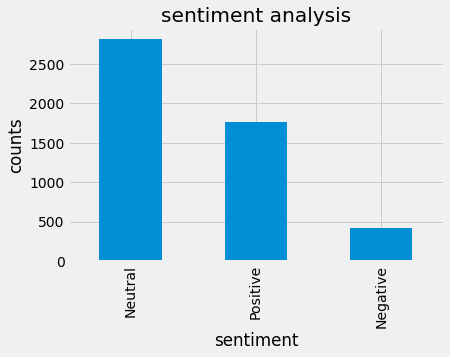

In [ ]:
#show the value counts for bjp

df1['analysis'].value_counts()

#plot the visualize the counts for bjp
plt.title('sentiment analysis')
plt.xlabel('sentiment')
plt.ylabel('counts')
df1['analysis'].value_counts().plot(kind='bar')
plt.show()

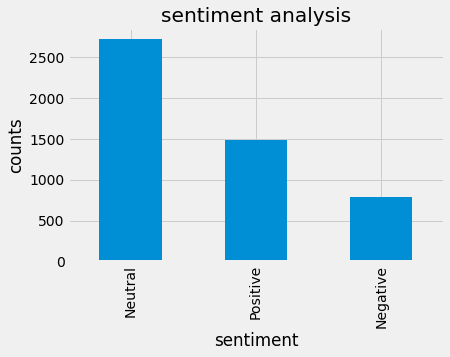

In [ ]:
#show the value counts for congress

df2['analysis'].value_counts()

#plot the visualize the counts for congress
plt.title('sentiment analysis')
plt.xlabel('sentiment')
plt.ylabel('counts')
df2['analysis'].value_counts().plot(kind='bar')
plt.show()

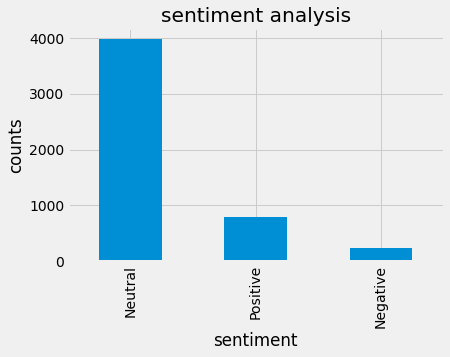

In [ ]:
#show the value counts for aap

df3['analysis'].value_counts()

#plot the visualize the counts for aap
plt.title('sentiment analysis')
plt.xlabel('sentiment')
plt.ylabel('counts')
df3['analysis'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
print("BJP wins ")

BJP wins 
